In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
file = pd.read_csv('namedf.csv')

### Checking the total unique names in the data shows there are 97310 names

In [87]:
names = pd.DataFrame(file)[['name','gender','count','year']]
name = 'Joseph'
finalForm = {}
for gender in ['M','F']:
    namedf = names[(names["name"]==f"{name}") & (names["gender"]==f"{gender}")][["year","count"]].reset_index().drop('index', axis=1)
    namedict = namedf.to_dict(orient='list')
    finalForm[f'{gender}'] = namedict
finalForm

{'M': {'year': [1880,
   1881,
   1882,
   1883,
   1884,
   1885,
   1886,
   1887,
   1888,
   1889,
   1890,
   1891,
   1892,
   1893,
   1894,
   1895,
   1896,
   1897,
   1898,
   1899,
   1900,
   1901,
   1902,
   1903,
   1904,
   1905,
   1906,
   1907,
   1908,
   1909,
   1910,
   1911,
   1912,
   1913,
   1914,
   1915,
   1916,
   1917,
   1918,
   1919,
   1920,
   1921,
   1922,
   1923,
   1924,
   1925,
   1926,
   1927,
   1928,
   1929,
   1930,
   1931,
   1932,
   1933,
   1934,
   1935,
   1936,
   1937,
   1938,
   1939,
   1940,
   1941,
   1942,
   1943,
   1944,
   1945,
   1946,
   1947,
   1948,
   1949,
   1950,
   1951,
   1952,
   1953,
   1954,
   1955,
   1956,
   1957,
   1958,
   1959,
   1960,
   1961,
   1962,
   1963,
   1964,
   1965,
   1966,
   1967,
   1968,
   1969,
   1970,
   1971,
   1972,
   1973,
   1974,
   1975,
   1976,
   1977,
   1978,
   1979,
   1980,
   1981,
   1982,
   1983,
   1984,
   1985,
   1986,
   1987,
   1988,
   198

In [4]:
len(namedf.name.unique())

97310

### To speed up the site i'm going to find the top 500 Female and top 500 male names then save the graph for them. They can later be looked up in a hash table. Other less common names will still need to be graphed.

In [5]:
maledf = namedf[namedf['gender']=='M']
femaledf = namedf[namedf['gender']=='F']

In [6]:
maledf.groupby(['name']).sum().sort_values('count',ascending=False)[:500]['count']
males = pd.DataFrame(maledf.groupby(['name']).sum().sort_values('count',ascending=False)[:500]['count'])
males.reset_index(level=0, inplace=True)
males

,name,count
0,James,5150472
1,John,5115466
2,Robert,4814815
3,Michael,4350824
4,William,4102604
5,David,3611329
6,Joseph,2603445
7,Richard,2563082
8,Charles,2386048
9,Thomas,2304948


In [7]:
femaledf.groupby(['name']).sum().sort_values('count',ascending=False)[:500]['count']
females = pd.DataFrame(femaledf.groupby(['name']).sum().sort_values('count',ascending=False)[:500]['count'])
females.reset_index(level=0, inplace=True)
females

,name,count
0,Mary,4123200
1,Elizabeth,1629679
2,Patricia,1571692
3,Jennifer,1466281
4,Linda,1452249
5,Barbara,1434060
6,Margaret,1246649
7,Susan,1121440
8,Dorothy,1107096
9,Sarah,1073895


### graphs() was used to create the premade graph images of the most popular male and female names

In [8]:
def graphs(topnames, gender):
    names = pd.read_csv("namedf.csv")[['name','gender','count','year']]
    for name in topnames:
        name = name.title()
        plt.clf()
        plt.plot(names[(names['name']==f'{name}') & (names['gender']==f'{gender}')]['year'].astype(str),
                            names[(names['name']==f'{name}') & (names['gender']==f'{gender}')]['count'].astype(int),
                            c='b',
                            marker='o',
                            label=f'{name} : M')
        plt.xticks(rotation=90)
        plt.grid()
        plt.title(f"Popularity of Name for {str(name).title()} (US)")
        plt.ylabel("Name Count")
        plt.legend()
        plt.savefig(f"../static/img/pregraphed/{gender}/{name}.png")

KeyboardInterrupt: 

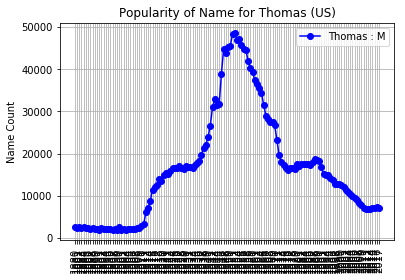

In [9]:
graphs(males.name, 'M')
graphs(females.name,'F')

In [ ]:
pregraphedMales = {}
for filename in os.listdir("../static/img/pregraphed/M"):
    pregraphedMales[f"{filename.split('.')[0]}"] = filename
pregraphedFemales = {}
for filename in os.listdir("../static/img/pregraphed/F"):
    pregraphedFemales[f"{filename.split('.')[0]}"] = filename

### The dictionaries of names made for namesDictionary.py

In [ ]:
pregraphedMales

In [ ]:
pregraphedFemales

In [2]:
countryDF = pd.DataFrame()
for filename in os.listdir("namesbystate"):
        if '.TXT' in filename:
            file = pd.read_csv(f"namesbystate/{filename}", header=None)
            stateDF = pd.DataFrame(file)
            print(filename)
            countryDF = countryDF.append(stateDF, ignore_index=False)

AK.TXT
AL.TXT
AR.TXT
AZ.TXT
CA.TXT
CO.TXT
CT.TXT
DC.TXT
DE.TXT
FL.TXT
GA.TXT
HI.TXT
IA.TXT
ID.TXT
IL.TXT
IN.TXT
KS.TXT
KY.TXT
LA.TXT
MA.TXT
MD.TXT
ME.TXT
MI.TXT
MN.TXT
MO.TXT
MS.TXT
MT.TXT
NC.TXT
ND.TXT
NE.TXT
NH.TXT
NJ.TXT
NM.TXT
NV.TXT
NY.TXT
OH.TXT
OK.TXT
OR.TXT
PA.TXT
RI.TXT
SC.TXT
SD.TXT
TN.TXT
TX.TXT
UT.TXT
VA.TXT
VT.TXT
WA.TXT
WI.TXT
WV.TXT
WY.TXT


In [3]:
countryDF.rename(columns={0:'state',1:'gender',2:'year',3:'name',4:'count'}, inplace=True)

In [6]:
def choropleth(name):
    # read in csv
    name = name.title()
    df = pd.read_csv("namesByState.csv")[['state','gender','year','name','count']]
    # filter based on name provided
    return df[df['name']==f'{name}'][['state','gender','year','count']].pivot_table('count', ['state','gender'], 'year')

In [ ]:
for name in countryDF['name'].unique():
    choropleth(name).to_csv(f"nameState/{name}.csv")